In [ ]:
pip install lightgbm

In [1]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


In [4]:
base= pd.read_csv("C:/Users/MARILYN/Downloads/BaseTratada.csv")
base

,FECHA_SOLICITUD,FECHA_CONTRATO,mth_sol,mth_contrato,TIENE_CONTRATO,IMPAGADOR,SEGMENTO_MOB_CLIENTE,APROBADO_POLITICA,ACCOUNT_OPENING_DATE_DIF_MONTHS,APL_S3,...,TIP_MAXIMO_ANTES_12M,TOTAL_DISCOUNT_MAXIMO_ANTES_S24_S36,TOTAL_DISCOUNT_MAXIMO_ANTES_S48_S56,TOTAL_DISCOUNT_SUMA_ANTES_S48_S56,TOTAL_MOP05,TOTAL_T_MOPS,USER_AGE,UTILIZATION_IN_RESOLVING,SCORE,SCORE_TRANSFORMADO
0,53:57.2,09:36.8,01/09/2021,01/09/2021,1,0,G,1,8,0,...,15.0,355.00,-1.0,-1.0,0,0,35,100,0.308022,223
1,48:17.8,06:32.3,01/08/2021,01/08/2021,1,0,G,1,1,0,...,20.0,0.00,-1.0,-1.0,0,0,39,39,0.281160,227
2,53:14.9,58:18.7,01/09/2021,01/09/2021,1,1,B,1,40,2,...,20.0,-1.00,-1.0,-1.0,0,0,46,0,0.284695,227
3,50:37.4,58:26.5,01/08/2021,01/08/2021,1,0,G,1,4,4,...,30.0,-1.00,-1.0,-1.0,0,0,24,74,0.336120,220
4,46:22.7,12:43.7,01/09/2021,01/10/2021,1,0,G,1,18,2,...,0.0,-1.00,99.0,211.1,0,0,26,0,0.149582,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51656,01:31.8,28:36.8,01/05/2022,01/05/2022,1,0,G,1,6,2,...,20.0,138.00,60.0,180.0,4,18,47,258,0.240235,233
51657,51:59.6,56:15.5,01/04/2022,01/04/2022,1,1,B,1,4,0,...,30.0,426.08,171.0,171.0,0,0,27,36,0.095542,265
51658,00:51.4,07:26.2,01/04/2022,01/04/2022,1,0,G,1,7,4,...,20.0,-1.00,-1.0,-1.0,0,0,28,0,0.075937,272
51659,51:53.6,55:20.5,01/06/2022,01/06/2022,1,0,G,1,5,1,...,20.0,190.00,247.0,247.0,1,5,35,74,0.212272,238


In [5]:
Data=base[base['TIENE_CONTRATO']==True] #Subconjunto de datos de aquellos que tienen contrato.
Dat=Data[Data['SEGMENTO_MOB_CLIENTE'] != "SS"]
Data1=Dat[Dat['SEGMENTO_MOB_CLIENTE'] != "I"]
Data1

,FECHA_SOLICITUD,FECHA_CONTRATO,mth_sol,mth_contrato,TIENE_CONTRATO,IMPAGADOR,SEGMENTO_MOB_CLIENTE,APROBADO_POLITICA,ACCOUNT_OPENING_DATE_DIF_MONTHS,APL_S3,...,TIP_MAXIMO_ANTES_12M,TOTAL_DISCOUNT_MAXIMO_ANTES_S24_S36,TOTAL_DISCOUNT_MAXIMO_ANTES_S48_S56,TOTAL_DISCOUNT_SUMA_ANTES_S48_S56,TOTAL_MOP05,TOTAL_T_MOPS,USER_AGE,UTILIZATION_IN_RESOLVING,SCORE,SCORE_TRANSFORMADO
0,53:57.2,09:36.8,01/09/2021,01/09/2021,1,0,G,1,8,0,...,15.0,355.00,-1.0,-1.0,0,0,35,100,0.308022,223
1,48:17.8,06:32.3,01/08/2021,01/08/2021,1,0,G,1,1,0,...,20.0,0.00,-1.0,-1.0,0,0,39,39,0.281160,227
2,53:14.9,58:18.7,01/09/2021,01/09/2021,1,1,B,1,40,2,...,20.0,-1.00,-1.0,-1.0,0,0,46,0,0.284695,227
3,50:37.4,58:26.5,01/08/2021,01/08/2021,1,0,G,1,4,4,...,30.0,-1.00,-1.0,-1.0,0,0,24,74,0.336120,220
4,46:22.7,12:43.7,01/09/2021,01/10/2021,1,0,G,1,18,2,...,0.0,-1.00,99.0,211.1,0,0,26,0,0.149582,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51656,01:31.8,28:36.8,01/05/2022,01/05/2022,1,0,G,1,6,2,...,20.0,138.00,60.0,180.0,4,18,47,258,0.240235,233
51657,51:59.6,56:15.5,01/04/2022,01/04/2022,1,1,B,1,4,0,...,30.0,426.08,171.0,171.0,0,0,27,36,0.095542,265
51658,00:51.4,07:26.2,01/04/2022,01/04/2022,1,0,G,1,7,4,...,20.0,-1.00,-1.0,-1.0,0,0,28,0,0.075937,272
51659,51:53.6,55:20.5,01/06/2022,01/06/2022,1,0,G,1,5,1,...,20.0,190.00,247.0,247.0,1,5,35,74,0.212272,238


In [6]:
VarC=list(Data1.select_dtypes(include=["int","float"]).columns) #Variables continuas.
VarC

['TIENE_CONTRATO',
 'IMPAGADOR',
 'APROBADO_POLITICA',
 'ACCOUNT_OPENING_DATE_DIF_MONTHS',
 'APL_S3',
 'APL_S37_S48',
 'APL_S8',
 'APL_S9_S12',
 'APL_S9',
 'APL_ULTIMOS_12M',
 'AVG_CREDIT_LIMIT_TDC',
 'AVG_HIGH_CREDIT_CC',
 'AVG_IMPAGO_CONTACTOS',
 'AVG_LIMITE_CUENTA_CONTACTOS',
 'AVG_P_REVOLVENTE_CONTACTOS',
 'AVG_P_TOTALERO_CONTACTOS',
 'AVG_PAY_TDC',
 'AVG_PERIODOS_CONTACTOS',
 'BC_ANTIGUEDAD_MONTHLY',
 'BC_REGISTERED_ADDRESSES',
 'CANCEL_PER_ORDER',
 'CANCELADAS_POR_PAYMENT_ERROR_ACT',
 'CANTIDAD_VENCIDA',
 'CITY',
 'COMPARTE_CONTACTOS',
 'COUNT_C',
 'CREDIT_LIMIT_AUTO',
 'CREDIT_LIMIT_HIPO',
 'CREDIT_LIMIT_TDC',
 'DEUDA_TOTAL',
 'DSCT_LEVEL',
 'FAV_SUB_GROUP_A',
 'FAVORITE_PAYMENT_METHOD',
 'GMV_MAXIMO_ANTES_9M',
 'GMV_MAXIMO_ANTES_S12_S24',
 'GMV_MAXIMO_ANTES_S24_S36',
 'HIGHEST_HISTORIC_MOP_AMOUNT',
 'HIGHEST_HISTORIC_MOP_SENIORITY_MONTHS',
 'HIGHEST_HISTORIC_MOP',
 'LADA',
 'LAG_ORDENES_PROMEDIO_ANTES_12M',
 'LAG_ORDENES_PROMEDIO_ANTES_9M',
 'LAG_ORDENES_PROMEDIO_ANTES_S24_S36'

In [7]:
VarD=list(Data1.select_dtypes(include=["object", "bool"]).columns) #Variables discretas.
VarD

['FECHA_SOLICITUD',
 'FECHA_CONTRATO',
 'mth_sol',
 'mth_contrato',
 'SEGMENTO_MOB_CLIENTE']

In [10]:
#VarB=["TIENE_CONTRATO", "APROBADO_POLITICA", "ON_S9_S12"]
#for i in VarB:
 #   VarD.remove(i)

In [11]:
def tabla_distribucion_variable(df,var): 
    tabla = df[var].value_counts(1).reset_index()
    tabla.columns=[var,"frecuencia"]
    tabla["frecuencia acumulada"]= tabla["frecuencia"].cumsum()
    tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
    return tabla

for i in VarC:
    print(tabla_distribucion_variable(Data1,i))

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

  TIENE_CONTRATO  frecuencia  frecuencia acumulada
0              1         1.0                   1.0
1        Ausente         0.0                   1.0
  IMPAGADOR  frecuencia  frecuencia acumulada
0         0     0.84288               0.84288
1         1     0.15712               1.00000
2   Ausente     0.00000               1.00000
  APROBADO_POLITICA  frecuencia  frecuencia acumulada
0                 1         1.0                   1.0
1           Ausente         0.0                   1.0
    ACCOUNT_OPENING_DATE_DIF_MONTHS  frecuencia  frecuencia acumulada
0                                 2    0.136292              0.136292
1                                 1    0.122026              0.258319
2                                 3    0.108244              0.366563
3                                 4    0.086351              0.452914
4                                 5    0.070498              0.523412
..                              ...         ...                   ...
199        

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

      LAG_ORDENES_PROMEDIO_ANTES_9M  frecuencia  frecuencia acumulada
0                              -1.0    0.067556              0.067556
1                              14.0    0.000290              0.067846
2                              28.0    0.000213              0.068059
3                              29.0    0.000194              0.068253
4                              56.0    0.000194              0.068446
...                             ...         ...                   ...
42140                    159.861111    0.000019              0.999942
42141                      2.704607    0.000019              0.999961
42142                      3.455128    0.000019              0.999981
42143                     27.236111    0.000019              1.000000
42144                       Ausente    0.000000              1.000000

[42145 rows x 3 columns]
      LAG_ORDENES_PROMEDIO_ANTES_S24_S36  frecuencia  frecuencia acumulada
0                                   -1.0    0.413813       

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

      SERVICE_COST_SUMA_ANTES_S24_S36  frecuencia  frecuencia acumulada
0                                -1.0    0.400902              0.400902
1                               20.99    0.003562              0.404464
2                               35.68    0.002497              0.406961
3                               23.74    0.001878              0.408838
4                               38.42    0.001452              0.410290
...                               ...         ...                   ...
23515                          302.87    0.000019              0.999942
23516                         1581.49    0.000019              0.999961
23517                         -567.82    0.000019              0.999981
23518                         -800.91    0.000019              1.000000
23519                         Ausente    0.000000              1.000000

[23520 rows x 3 columns]
      SERVICE_COST_SUMA_ANTES_S36_S48  frecuencia  frecuencia acumulada
0                                -1.0 

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)


In [12]:
Data1.loc[:,VarC]=Data1[VarC].fillna(-1)

In [13]:
for i in VarC:
    print(tabla_distribucion_variable(Data1,i))

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

  TIENE_CONTRATO  frecuencia  frecuencia acumulada
0              1         1.0                   1.0
1        Ausente         0.0                   1.0
  IMPAGADOR  frecuencia  frecuencia acumulada
0         0     0.84288               0.84288
1         1     0.15712               1.00000
2   Ausente     0.00000               1.00000
  APROBADO_POLITICA  frecuencia  frecuencia acumulada
0                 1         1.0                   1.0
1           Ausente         0.0                   1.0
    ACCOUNT_OPENING_DATE_DIF_MONTHS  frecuencia  frecuencia acumulada
0                                 2    0.136292              0.136292
1                                 1    0.122026              0.258319
2                                 3    0.108244              0.366563
3                                 4    0.086351              0.452914
4                                 5    0.070498              0.523412
..                              ...         ...                   ...
199        

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

      LAG_ORDENES_PROMEDIO_ANTES_9M  frecuencia  frecuencia acumulada
0                              -1.0    0.067556              0.067556
1                              14.0    0.000290              0.067846
2                              28.0    0.000213              0.068059
3                              29.0    0.000194              0.068253
4                              56.0    0.000194              0.068446
...                             ...         ...                   ...
42140                    159.861111    0.000019              0.999942
42141                      2.704607    0.000019              0.999961
42142                      3.455128    0.000019              0.999981
42143                     27.236111    0.000019              1.000000
42144                       Ausente    0.000000              1.000000

[42145 rows x 3 columns]
      LAG_ORDENES_PROMEDIO_ANTES_S24_S36  frecuencia  frecuencia acumulada
0                                   -1.0    0.413813       

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

      SALDO_PRESTAMOS  frecuencia  frecuencia acumulada
0                   0    0.759141              0.759141
1               30000    0.000135              0.759277
2                 500    0.000116              0.759393
3                 660    0.000116              0.759509
4                8157    0.000116              0.759625
...               ...         ...                   ...
11703           13926    0.000019              0.999942
11704           40746    0.000019              0.999961
11705          242969    0.000019              0.999981
11706          194370    0.000019              1.000000
11707         Ausente    0.000000              1.000000

[11708 rows x 3 columns]
      SALDO_TDC  frecuencia  frecuencia acumulada
0             0    0.103231              0.103231
1             1    0.001471              0.104702
2           348    0.000755              0.105457
3           549    0.000697              0.106154
4          1000    0.000658              0.106812
..

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)


In [14]:
for i in VarD:
    Data1[i].fillna("Missing",inplace=True)

In [15]:
for i in VarD:
    print(tabla_distribucion_variable(Data1,i))

      FECHA_SOLICITUD  frecuencia  frecuencia acumulada
0             04:46.2    0.000174              0.000174
1             43:55.8    0.000174              0.000348
2             31:17.9    0.000155              0.000503
3             29:12.1    0.000155              0.000658
4             41:46.1    0.000155              0.000813
...               ...         ...                   ...
27472         23:20.9    0.000019              0.999942
27473         48:24.7    0.000019              0.999961
27474         51:23.3    0.000019              0.999981
27475         00:51.4    0.000019              1.000000
27476         Ausente    0.000000              1.000000

[27477 rows x 3 columns]
      FECHA_CONTRATO  frecuencia  frecuencia acumulada
0            50:43.9    0.000174              0.000174
1            39:25.4    0.000155              0.000329
2            22:50.5    0.000155              0.000484
3            30:23.5    0.000155              0.000639
4            12:47.4    0.0

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

In [16]:
for i in VarB:#Ciclo según las variables en la lista VarB
    Data1[i] = Data1[i].fillna("FALSE").astype(bool) #Se cambian los valores de Data1 de las variables según VarB. El registro se vuelve entero desde una escala de -1.



In [17]:
for i in VarB:
    print(tabla_distribucion_variable(Data1,i))

  TIENE_CONTRATO  frecuencia  frecuencia acumulada
0           True         1.0                   1.0
1        Ausente         0.0                   1.0
  APROBADO_POLITICA  frecuencia  frecuencia acumulada
0              True         1.0                   1.0
1           Ausente         0.0                   1.0
  ON_S9_S12  frecuencia  frecuencia acumulada
0      True    0.784557              0.784557
1     False    0.215443              1.000000
2   Ausente    0.000000              1.000000


C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)


In [18]:
def agrupar_categorias(df,VarDisc):
    for i in VarDisc:
        if i in df.columns:
            if df[i].nunique()>20:
                categorias_comunes = df[i].value_counts().index[:20] #Tomar las 20 categorías más comunes.
                df[i]=df[i].apply(lambda x: x if x in categorias_comunes else 'Other')
    return df
Data1= agrupar_categorias(Data1,VarD)
Data1

,FECHA_SOLICITUD,FECHA_CONTRATO,mth_sol,mth_contrato,TIENE_CONTRATO,IMPAGADOR,SEGMENTO_MOB_CLIENTE,APROBADO_POLITICA,ACCOUNT_OPENING_DATE_DIF_MONTHS,APL_S3,...,TIP_MAXIMO_ANTES_12M,TOTAL_DISCOUNT_MAXIMO_ANTES_S24_S36,TOTAL_DISCOUNT_MAXIMO_ANTES_S48_S56,TOTAL_DISCOUNT_SUMA_ANTES_S48_S56,TOTAL_MOP05,TOTAL_T_MOPS,USER_AGE,UTILIZATION_IN_RESOLVING,SCORE,SCORE_TRANSFORMADO
0,Other,Other,01/09/2021,01/09/2021,True,0,G,True,8,0,...,15.0,355.00,-1.0,-1.0,0,0,35,100,0.308022,223
1,Other,Other,01/08/2021,01/08/2021,True,0,G,True,1,0,...,20.0,0.00,-1.0,-1.0,0,0,39,39,0.281160,227
2,Other,Other,01/09/2021,01/09/2021,True,1,B,True,40,2,...,20.0,-1.00,-1.0,-1.0,0,0,46,0,0.284695,227
3,Other,Other,01/08/2021,01/08/2021,True,0,G,True,4,4,...,30.0,-1.00,-1.0,-1.0,0,0,24,74,0.336120,220
4,Other,Other,01/09/2021,01/10/2021,True,0,G,True,18,2,...,0.0,-1.00,99.0,211.1,0,0,26,0,0.149582,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51656,Other,Other,01/05/2022,01/05/2022,True,0,G,True,6,2,...,20.0,138.00,60.0,180.0,4,18,47,258,0.240235,233
51657,Other,Other,01/04/2022,01/04/2022,True,1,B,True,4,0,...,30.0,426.08,171.0,171.0,0,0,27,36,0.095542,265
51658,Other,Other,01/04/2022,01/04/2022,True,0,G,True,7,4,...,20.0,-1.00,-1.0,-1.0,0,0,28,0,0.075937,272
51659,Other,Other,01/06/2022,01/06/2022,True,0,G,True,5,1,...,20.0,190.00,247.0,247.0,1,5,35,74,0.212272,238


In [19]:
for i in VarD:
    print(tabla_distribucion_variable(Data1,i))

   FECHA_SOLICITUD  frecuencia  frecuencia acumulada
0            Other    0.997077              0.997077
1          04:46.2    0.000174              0.997251
2          43:55.8    0.000174              0.997426
3          29:12.1    0.000155              0.997580
4          54:39.0    0.000155              0.997735
5          40:53.0    0.000155              0.997890
6          41:46.1    0.000155              0.998045
7          31:17.9    0.000155              0.998200
8          38:59.8    0.000155              0.998355
9          59:29.1    0.000155              0.998510
10         01:08.9    0.000135              0.998645
11         35:23.0    0.000135              0.998781
12         16:28.0    0.000135              0.998916
13         23:49.5    0.000135              0.999052
14         35:22.7    0.000135              0.999187
15         07:21.5    0.000135              0.999323
16         57:58.5    0.000135              0.999458
17         32:26.4    0.000135              0.

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

In [20]:
def clasificar_otros(df,nv):
    b=[]
    b=df[nv].value_counts(1)>0.01
    B=pd.DataFrame(b)
    C=B[B[nv]==True]
    if B[nv].values[0]==True:
        mayor_uno_porciento = df[nv].value_counts(1).index[:len(C)] #Tomar las c categorías cuya freciencia es mayor a 0.01.
        df[nv]=df[nv].apply(lambda x: x if x in mayor_uno_porciento else 'Other')
    else: 
        df[nv]=df[nv].apply(lambda x: 'Other')
    return df

In [21]:
for i in VarD:
    Data1 = clasificar_otros(Data1,i)

In [22]:
for i in VarD:
    print(tabla_distribucion_variable(Data1,i))

  FECHA_SOLICITUD  frecuencia  frecuencia acumulada
0           Other         1.0                   1.0
1         Ausente         0.0                   1.0
  FECHA_CONTRATO  frecuencia  frecuencia acumulada
0          Other         1.0                   1.0
1        Ausente         0.0                   1.0
       mth_sol  frecuencia  frecuencia acumulada
0   01/03/2022    0.140957              0.140957
1   01/05/2022    0.138789              0.279747
2   01/04/2022    0.124465              0.404212
3   01/11/2021    0.112541              0.516753
4   01/10/2021    0.110373              0.627127
5   01/12/2021    0.096011              0.723137
6   01/06/2022    0.088287              0.811424
7   01/09/2021    0.069143              0.880568
8   01/01/2022    0.064343              0.944910
9   01/02/2022    0.048586              0.993496
10       Other    0.006504              1.000000
11     Ausente    0.000000              1.000000
   mth_contrato  frecuencia  frecuencia acumulada
0   

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

In [23]:
le=LabelEncoder() #Transformación de variables (de discretas a continuas).
for i in VarD:
    Data1[i] = le.fit_transform(Data1[i])

In [24]:
for i in VarD:
    print(tabla_distribucion_variable(Data1,i))

  FECHA_SOLICITUD  frecuencia  frecuencia acumulada
0               0         1.0                   1.0
1         Ausente         0.0                   1.0
  FECHA_CONTRATO  frecuencia  frecuencia acumulada
0              0         1.0                   1.0
1        Ausente         0.0                   1.0
    mth_sol  frecuencia  frecuencia acumulada
0         2    0.140957              0.140957
1         4    0.138789              0.279747
2         3    0.124465              0.404212
3         8    0.112541              0.516753
4         7    0.110373              0.627127
5         9    0.096011              0.723137
6         5    0.088287              0.811424
7         6    0.069143              0.880568
8         0    0.064343              0.944910
9         1    0.048586              0.993496
10       10    0.006504              1.000000
11  Ausente    0.000000              1.000000
   mth_contrato  frecuencia  frecuencia acumulada
0             4    0.140803              0.

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

In [25]:
for i in VarB:#Ciclo según las variables en la lista VarB
    Data1[i] = Data1[i].astype(float) #Se cambian los valores de Data1 de las variables según VarB. El registro se vuelve entero desde una escala de -1.


In [26]:
for i in VarB:
    print(tabla_distribucion_variable(Data1,i))

  TIENE_CONTRATO  frecuencia  frecuencia acumulada
0            1.0         1.0                   1.0
1        Ausente         0.0                   1.0
  APROBADO_POLITICA  frecuencia  frecuencia acumulada
0               1.0         1.0                   1.0
1           Ausente         0.0                   1.0
  ON_S9_S12  frecuencia  frecuencia acumulada
0       1.0    0.784557              0.784557
1       0.0    0.215443              1.000000
2   Ausente    0.000000              1.000000


C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)


In [27]:
for i in VarC:
    print(tabla_distribucion_variable(Data1,i))

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

  TIENE_CONTRATO  frecuencia  frecuencia acumulada
0            1.0         1.0                   1.0
1        Ausente         0.0                   1.0
  IMPAGADOR  frecuencia  frecuencia acumulada
0         0     0.84288               0.84288
1         1     0.15712               1.00000
2   Ausente     0.00000               1.00000
  APROBADO_POLITICA  frecuencia  frecuencia acumulada
0               1.0         1.0                   1.0
1           Ausente         0.0                   1.0
    ACCOUNT_OPENING_DATE_DIF_MONTHS  frecuencia  frecuencia acumulada
0                                 2    0.136292              0.136292
1                                 1    0.122026              0.258319
2                                 3    0.108244              0.366563
3                                 4    0.086351              0.452914
4                                 5    0.070498              0.523412
..                              ...         ...                   ...
199        

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

     MAX_CREDIT_LIMIT_TDC  frecuencia  frecuencia acumulada
0                   20000    0.074273              0.074273
1                   10000    0.037765              0.112038
2                    2000    0.029636              0.141674
3                    6000    0.028958              0.170632
4                    5000    0.027584              0.198215
...                   ...         ...                   ...
5493                29646    0.000019              0.999942
5494                15595    0.000019              0.999961
5495               300190    0.000019              0.999981
5496               310600    0.000019              1.000000
5497              Ausente    0.000000              1.000000

[5498 rows x 3 columns]
      MAX_HIGH_CREDIT_CC  frecuencia  frecuencia acumulada
0                      0    0.008459              0.008459
1                  10000    0.005923              0.014382
2                   5000    0.005401              0.019783
3                  

C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
C:\Users\MARILYN

      SERVICE_COST_SUMA_ANTES_3M  frecuencia  frecuencia acumulada
0                           -1.0    0.345967              0.345967
1                          20.99    0.003233              0.349200
2                          40.57    0.002187              0.351387
3                          17.35    0.001684              0.353071
4                          36.93    0.001568              0.354639
...                          ...         ...                   ...
25312                     189.47    0.000019              0.999942
25313                      58.94    0.000019              0.999961
25314                     358.66    0.000019              0.999981
25315                    -186.63    0.000019              1.000000
25316                    Ausente    0.000000              1.000000

[25317 rows x 3 columns]
      SERVICE_COST_SUMA_ANTES_9M  frecuencia  frecuencia acumulada
0                           -1.0    0.070827              0.070827
1                          20.99    

In [28]:
for i in VarC:#Ciclo según las variables en la lista VarB
    Data1[i] = np.float_(Data1[i])


In [29]:
Var_ID=[ "FECHA_SOLICITUD", "FECHA_CONTRATO", "mth_sol", "mth_contrato" , "TIENE_CONTRATO", "APL_S3", "SEGMENTO_MOB_CLIENTE", "APROBADO_POLITICA", "SCORE", "SCORE_TRANSFORMADO"]
NRappi=Data1.drop(Var_ID,axis=1)







In [30]:
NRappi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51661 entries, 0 to 51660
Columns: 114 entries, IMPAGADOR to UTILIZATION_IN_RESOLVING
dtypes: float64(114)
memory usage: 45.3 MB


In [31]:
y = NRappi['IMPAGADOR']
X=NRappi.drop("IMPAGADOR", axis=1)


In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [33]:
model=LGBMClassifier(
 objective= 'binary',
 metric='binary_logloss',
 n_estimators= 96,
 max_depth= 2,
 num_leaves=18,
 min_split_gain =0.4226,
 max_bin=16320,
 path_smooth=0.5805,
 learning_rate=0.2706,
 lambda_l1=0.0077,
 lambda_l2=0.1514,
 max_delta_step=2.3777,
 subsample=0.3835,
 scale_pos_weight=4.3340

)

In [34]:
parameters={
    'objective': 'binary',
    'metric':'binary_logloss', 
    'n_estimators': 99,
    'max_depth': 6,
    'num_leaves':5,
    'min_split_gain':0.7,
    'max_bin': 30,
    'path_smooth':0.6,
    'lambda_l1': 0.0077,
    'lambda_l2': 0.1514,
    'max_delta_step':2.377,
    'subsample':0.8,
    'scale_pos_weight':6.7,
    'learning_rate':0.280, 
    'force_col_wise':True,
    'bagging_freq':9,
    'min_data_in_leaf':24,
    'linear_tree':True
}

In [35]:
mod=LGBMClassifier()
mod.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
mod=LGBMClassifier(
 objective= 'binary',
 metric='binary_logloss', 
 n_estimators= 99,
 max_depth= 2,
 num_leaves=18,
 min_split_gain=0.4226,
 max_bin=20,
 path_smooth=0.6,
 lambda_l1= 0.0077,
 lambda_l2=0.1514,
 max_delta_step=2.377,
 subsample=0.8,
 scale_pos_weight=6.7,
 learning_rate=0.290, 
 force_col_wise=True,
 bagging_freq= 9,
 min_data_in_leaf = 24,
 min_child_weight=1,
 linear_tree=True

)

In [38]:
mod.fit(x_train,y_train)



[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=0.0077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0077
[LightGBM] [Warning] lambda_l2 is set=0.1514, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1514
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=0.0077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0077
[LightGBM] [Warning] lambda_l2 is set=0.1514, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1514
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Info] Number of positive: 6451, number of negative: 34877
[LightGBM] [Info] Total Bins 209

LGBMClassifier(bagging_freq=9, force_col_wise=True, lambda_l1=0.0077,
               lambda_l2=0.1514, learning_rate=0.29, linear_tree=True,
               max_bin=20, max_delta_step=2.377, max_depth=2,
               metric='binary_logloss', min_child_weight=1, min_data_in_leaf=24,
               min_split_gain=0.4226, n_estimators=99, num_leaves=18,
               objective='binary', path_smooth=0.6, scale_pos_weight=6.7,
               subsample=0.8)

In [39]:
#Entrenamiento
y_prediccion=mod.predict(x_train)
y_pred=y_prediccion


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=0.0077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0077
[LightGBM] [Warning] lambda_l2 is set=0.1514, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1514
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


In [40]:
#Entrenamiento
accuracy= accuracy_score(y_train,y_prediccion) 
recall=recall_score(y_train, y_prediccion)
F1=f1_score(y_train,y_prediccion)
auc=roc_auc_score(y_train,y_prediccion)
print("ROC",auc)
print("F1", F1)
print("recall", recall)
print("Precisión", accuracy)

ROC 0.6995951296423709
F1 0.4030542677938369
recall 0.8018911796620679
Precisión 0.6292344173441734


In [41]:
#Test
y_predicciont=mod.predict(x_test)
y_predt=y_predicciont


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=0.0077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0077
[LightGBM] [Warning] lambda_l2 is set=0.1514, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1514
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


In [42]:
#Test
accuracy= accuracy_score(y_test,y_predicciont) 
recall=recall_score(y_test, y_predicciont)
F1=f1_score(y_test,y_predicciont)
auc=roc_auc_score(y_test,y_predicciont)
print("ROC",auc)
print("F1", F1) #Media armónica entre precisión y recall
print("recall", recall) #Capacidad del modelo para encontrar todas las muestras positivas.
print("Precisión", accuracy) #Coincidencia de resultados entre la muestra de predicción y la real.

ROC 0.6712389351725461
F1 0.3874361751508587
recall 0.751500600240096
Precisión 0.6168586083422046


In [43]:
importances = pd.DataFrame(data={
    'Variable': x_train.columns,
    'Importancia': mod.feature_importances_
})
importances = importances.sort_values(by='Importancia', ascending= False)
print(importances[:10])

                                  Variable  Importancia
112               UTILIZATION_IN_RESOLVING           12
0          ACCOUNT_OPENING_DATE_DIF_MONTHS            9
33   HIGHEST_HISTORIC_MOP_SENIORITY_MONTHS            8
32             HIGHEST_HISTORIC_MOP_AMOUNT            8
34                    HIGHEST_HISTORIC_MOP            7
42            LAST6_MONTHS_REQUESTS_NUMBER            7
12                             AVG_PAY_TDC            6
35                                    LADA            6
50                         MESES_EN_LIBROS            6
55                       N_ORDERS_TOP_REST            6


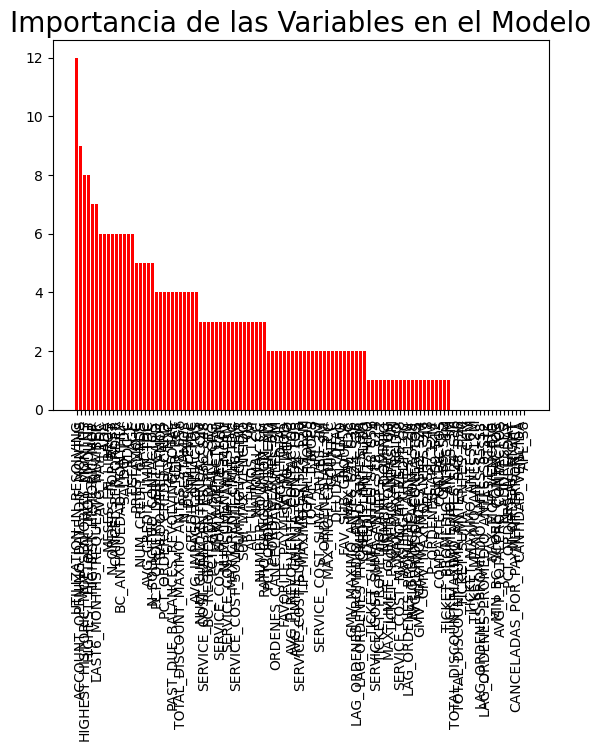

In [44]:
import matplotlib.pyplot as plt
plt.bar(x=importances['Variable'], height=importances['Importancia'], color='#FF0000')
plt.title('Importancia de las Variables en el Modelo', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [46]:
calificacion=NRappi.drop("IMPAGADOR", axis=1)
probabilidades = mod.predict(calificacion)
columna=["PI"]
df_PI=pd.DataFrame(probabilidades[:],columns=columna)
df_PI

[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] lambda_l1 is set=0.0077, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0077
[LightGBM] [Warning] lambda_l2 is set=0.1514, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1514
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


,PI
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
51656,1.0
51657,0.0
51658,0.0
51659,0.0


In [47]:
target=pd.DataFrame(NRappi["IMPAGADOR"])
Rappi_Final = pd.concat([target,df_PI],axis=1)
Rappi_Final

,IMPAGADOR,PI
0,0.0,1.0
1,0.0,1.0
2,1.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
51656,0.0,1.0
51657,1.0,0.0
51658,0.0,0.0
51659,0.0,0.0


In [49]:
print(tabla_distribucion_variable(Rappi_Final,"IMPAGADOR")) #Distribución de buenos y malos

  IMPAGADOR  frecuencia  frecuencia acumulada
0       0.0     0.84288               0.84288
1       1.0     0.15712               1.00000
2   Ausente     0.00000               1.00000


C:\Users\MARILYN\AppData\Local\Temp\ipykernel_92268\3495107917.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabla = tabla.append({var: "Ausente", "frecuencia": df[var].isnull().mean(),"frecuencia acumulada":1.0}, ignore_index=True)
